In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

Bad value in file WindowsPath('C:/Users/kangh/.matplotlib/stylelib/my_style.mplstyle'), line 1 ('figure.figsize : (10, 6)'): Key figure.figsize: Could not convert '(10' to float
Bad value in file WindowsPath('C:/Users/kangh/.matplotlib/stylelib/my_style.mplstyle'), line 4 ('text.color : #333333'): Key text.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/kangh/.matplotlib/stylelib/my_style.mplstyle'), line 9 ('axes.labelcolor : #4a4a4a'): Key axes.labelcolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/kangh/.matplotlib/stylelib/my_style.mplstyle'), line 10 ('axes.facecolor : #f9f9f9'): Key axes.facecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/kangh/.matplotlib/stylelib/my_style.mplstyle'), line 11 ('axes.edgecolor : #aaaaaa'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/kangh/.matplotlib/stylelib/my_style.mplstyle'), line 13 ('grid.color :

In [26]:
print(data.columns)


Index(['datetime', 'time', 'Severity', 'temperature_2m',
       'relative_humidity_2m', 'precipitation', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'forest_fire', 'year', 'month', 'day'],
      dtype='object')


In [27]:
# Loading the data
data = pd.read_csv('C:/Users/kangh/Desktop/dsan5550 final projecy/fire-prediction/final-datasets/Trihourly_Weather_Dataset.csv', sep=',')




In [22]:
# Transform 'forest_fire' into binary
# Y = 1 = forest_fire occured, N = 0 = forest_fire did not occur
data['forest_fire'] = data['forest_fire'].map({'Y': 1, 'N': 0})

In [23]:
# Populating the 'Severity' NaN values with 0
data['Severity'] = data['Severity'].fillna(0)

In [28]:
# Converting 'date' column to year, month, and day columns
# Dropping the original 'date' column
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop('date', axis=1, inplace=True)

In [29]:
# Converting 'time' column in hour, minute, second
# Dropping the original 'time' column
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['hour'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour
data['minute'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.minute
data.drop('time', axis=1, inplace=True)

In [30]:
# Dropping 'datetime' column to accommodate above steps
data.drop('datetime', axis=1, inplace=True)

In [31]:
# Filling in missing values
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

In [34]:
data['forest_fire'] = data['forest_fire'].map({'N': 0, 'Y': 1})
print(data['forest_fire'].unique())


[ 0. nan  1.]


In [35]:
# Count the number of negative samples (forest_fire = 0)
num_negative_samples = (data['forest_fire'] == 0).sum()

print("Number of negative samples (forest_fire = 0):", num_negative_samples)

Number of negative samples (forest_fire = 0): 11688


In [36]:
# Count the number of positive samples (forest_fire = 1)
num_positive_samples = (data['forest_fire'] == 1).sum()

print("Number of positive samples (forest_fire = 1):", num_positive_samples)

Number of positive samples (forest_fire = 1): 6421


In [37]:
# Set up features and target
X = data.drop(['forest_fire','Severity'], axis=1)
y = data['Severity']

In [38]:
# X = features
X.head()

,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,year,month,day,hour,minute
0,6.061000,67.824059,0.0,933.246216,20.400002,6.638072,6.061,8.061001,0.364,0.372,2020.0,1.0,1.0,7.0,0.0
1,3.861000,77.639603,0.0,931.856018,26.700001,4.693825,5.311,7.761000,0.364,0.372,2020.0,1.0,1.0,9.0,0.0
2,4.361000,75.236038,0.0,931.915161,14.400001,4.610250,3.911,6.961000,0.359,0.370,2020.0,1.0,1.0,12.0,0.0
3,6.111000,73.412125,0.0,932.712647,20.700001,8.788720,4.611,6.511000,0.359,0.369,2020.0,1.0,1.0,15.0,0.0
4,12.561001,61.951244,0.0,934.771851,0.000000,6.489992,7.461,6.511000,0.358,0.369,2020.0,1.0,1.0,18.0,0.0


In [39]:
# y = target = 'Severity' column
# Counting different 'Severity' values
y.value_counts()

Severity
0.000000     11688
27.500000      156
25.000000       90
36.935283        6
36.614845        5
             ...  
31.585665        1
31.582743        1
31.579553        1
31.573254        1
42.643980        1
Name: count, Length: 5476, dtype: int64

In [40]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost regressor model
regressor_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the regressor model on training dataset
regressor_model.fit(X_train, y_train)

# Making predictions on testing dataset
y_pred = regressor_model.predict(X_test)

# Evaluating and printing the model's performance
# Model's performance is the error between predicted and actual values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.632527555483956


In [41]:
# Creating a function that intakes severity values
# 0's indicate no wildfire occurence
def classify_severity(severity):
    if severity == 0:
        return 0
    else:
        return 1

# Create a new column called 'classified' and apply the 'Severity' column
data['classified'] = data['Severity'].apply(classify_severity)

# Output 'classified'
print(data['classified'])

0        0
1        0
2        0
3        0
4        0
        ..
18105    1
18106    1
18107    1
18108    1
18109    1
Name: classified, Length: 18110, dtype: int64


In [42]:
# Count the number of positive samples after regression model (classified = 1)
num_classified = (data['classified'] == 1).sum()

print("Number of positive samples (classified = 1):", num_classified)

Number of positive samples (classified = 1): 6422


In [43]:
# Count the number of positive samples before regression model (forest_fire = 1)
num_positive_samples = (data['forest_fire'] == 1).sum()

print("Number of positive samples (forest_fire = 1):", num_positive_samples)

Number of positive samples (forest_fire = 1): 6421


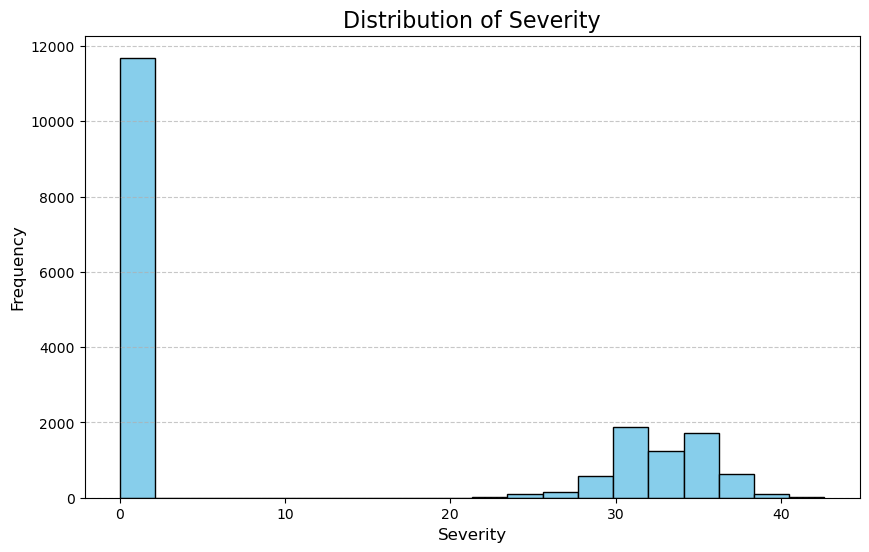

In [45]:
import matplotlib.pyplot as plt

# 直方图查看 Severity 分布
plt.figure(figsize=(10, 6))
plt.hist(data['Severity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Severity', fontsize=16)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


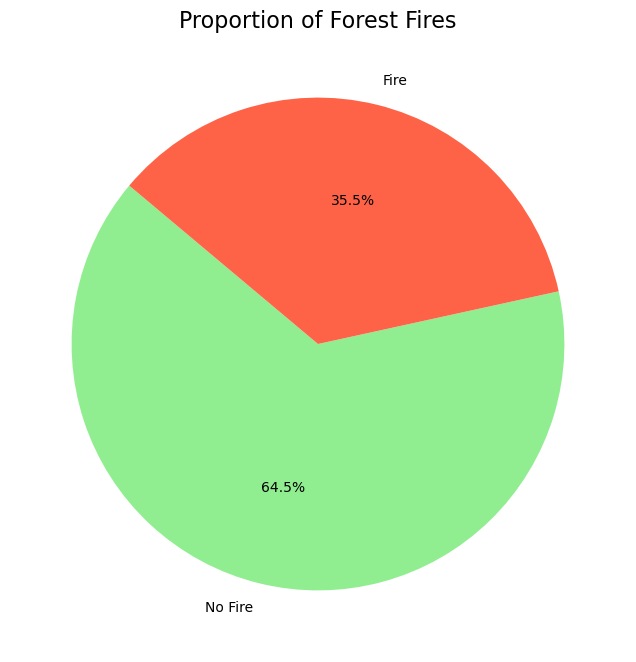

In [46]:
# 饼图查看火灾发生比例
fire_counts = data['forest_fire'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fire_counts, labels=['No Fire', 'Fire'], autopct='%1.1f%%', colors=['lightgreen', 'tomato'], startangle=140)
plt.title('Proportion of Forest Fires', fontsize=16)
plt.show()


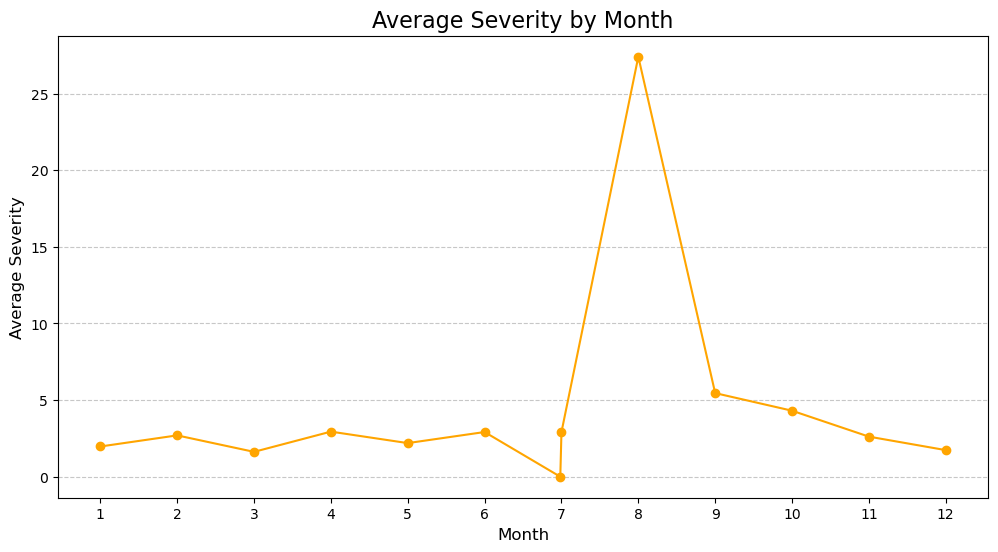

In [47]:
# 按月份统计平均 Severity
monthly_severity = data.groupby('month')['Severity'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_severity.index, monthly_severity.values, marker='o', color='orange')
plt.title('Average Severity by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Severity', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


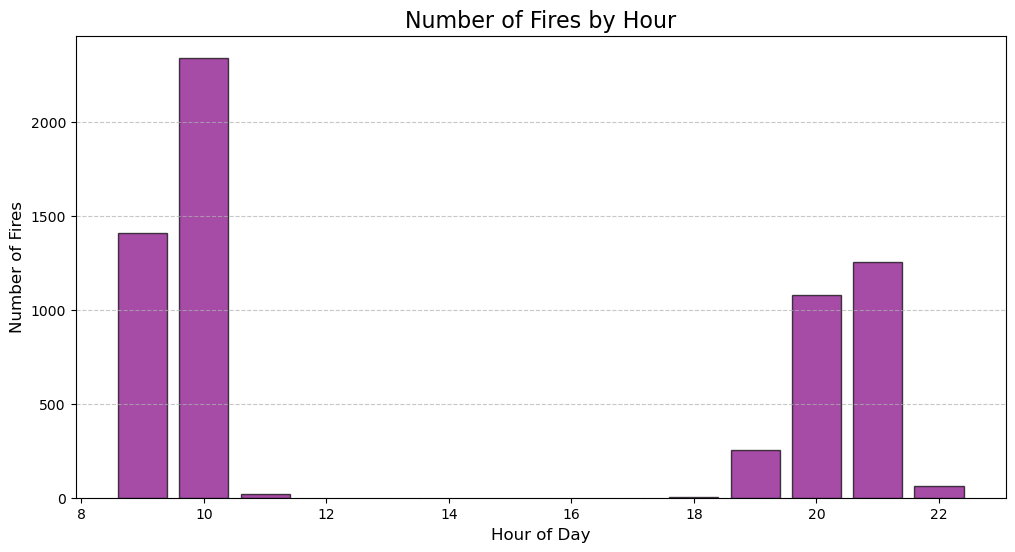

In [ ]:
# Number of fires by hour
hourly_fire = data[data['forest_fire'] == 1].groupby('hour')['forest_fire'].count()

plt.figure(figsize=(12, 6))
plt.bar(hourly_fire.index, hourly_fire.values, color='purple', edgecolor='black', alpha=0.7)
plt.title('Number of Fires by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


c:\Users\kangh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


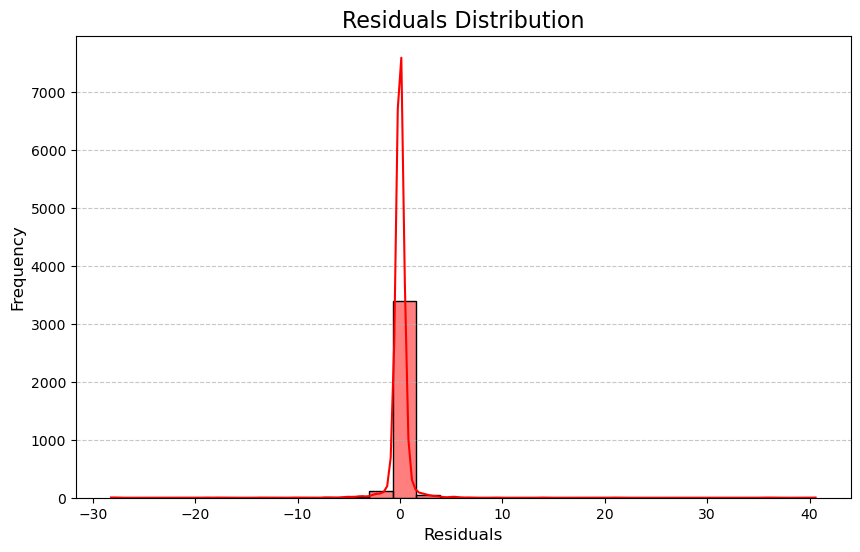

In [ ]:
import seaborn as sns
import numpy as np

# residual calculate
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


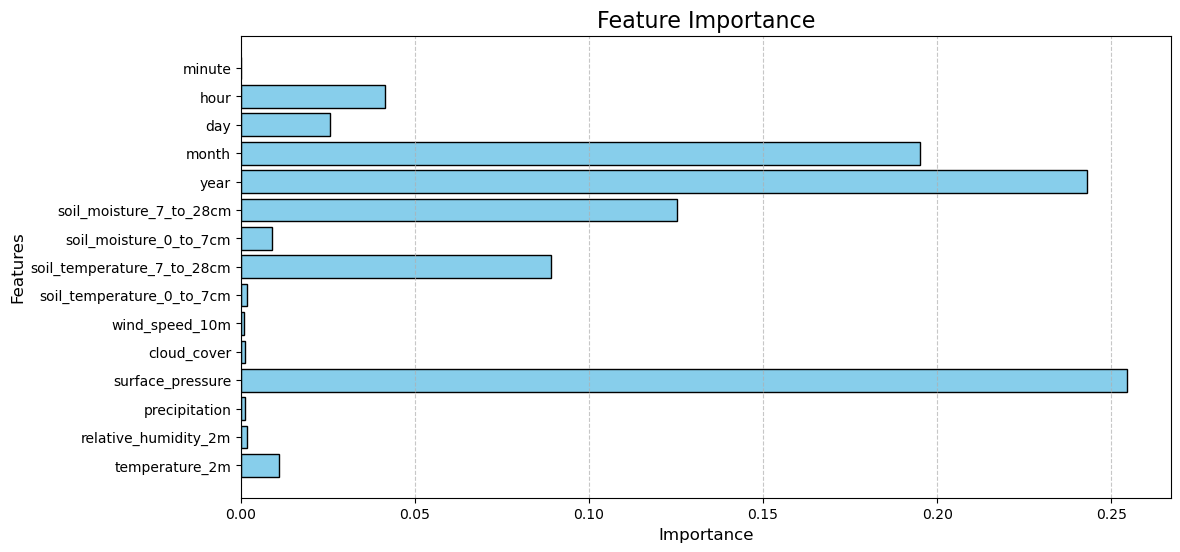

In [ ]:
# Feature importance 
importance = regressor_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, importance
, color='skyblue', edgecolor='black')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


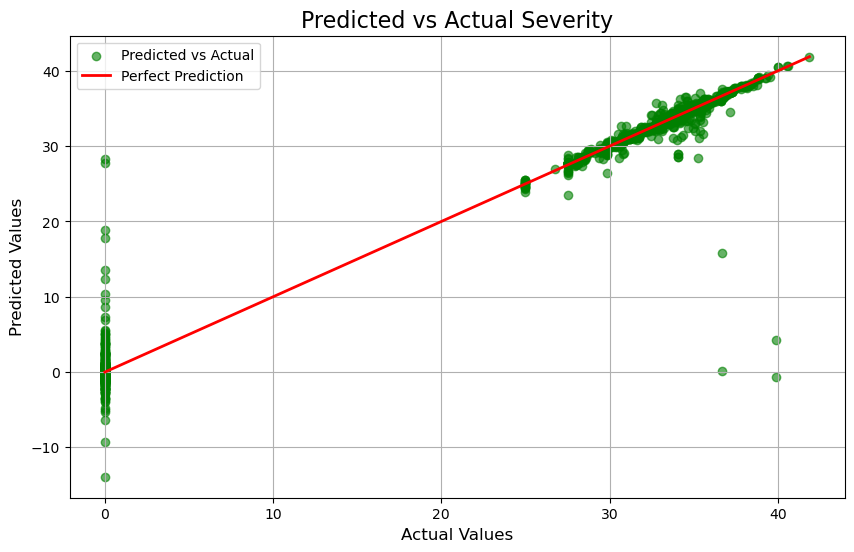

In [ ]:
# prediction vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Predicted vs Actual Severity', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


1. Enhance Feature Engineering
We'll create new derived features based on domain knowledge to potentially improve model performance. The new features are:

Interaction features:
Combine temperature and humidity: temp_humidity_interaction = temperature_2m * relative_humidity_2m.
Weather intensity:
Use wind speed and precipitation: weather_intensity = wind_speed_100m + precipitation.

In [53]:
# Add interaction features
data['temp_humidity_interaction'] = data['temperature_2m'] * data['relative_humidity_2m']

# Add weather intensity feature (using correct column name for wind speed)
data['weather_intensity'] = data['wind_speed_10m'] + data['precipitation']

# Check the updated dataset
print(data[['temp_humidity_interaction', 'weather_intensity']].head())



   temp_humidity_interaction  weather_intensity
0                 411.081610           6.638072
1                 299.766511           4.693825
2                 328.104367           4.610250
3                 448.621498           8.788720
4                 778.169631           6.489992


Next Steps
Now that we have added these features, follow these steps:

1. Include These Features in Model Training
Update the feature matrix (X) to include the new columns:

In [54]:
# Update feature matrix
X = data.drop(['Severity', 'forest_fire'], axis=1)  # Drop target and irrelevant columns
X = X[['temp_humidity_interaction', 'weather_intensity', 'temperature_2m', 'relative_humidity_2m', 'precipitation']]  # Select features of interest

# Verify updated feature matrix
print(X.head())


   temp_humidity_interaction  weather_intensity  temperature_2m  \
0                 411.081610           6.638072        6.061000   
1                 299.766511           4.693825        3.861000   
2                 328.104367           4.610250        4.361000   
3                 448.621498           8.788720        6.111000   
4                 778.169631           6.489992       12.561001   

   relative_humidity_2m  precipitation  
0             67.824059            0.0  
1             77.639603            0.0  
2             75.236038            0.0  
3             73.412125            0.0  
4             61.951244            0.0  


2. Train Linear Regression and XGBoost Models
Re-train both models (Linear Regression and XGBoost) using the updated feature set. Here’s the updated code:

In [56]:
from sklearn.linear_model import LinearRegression


In [57]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Train XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate both models
print("Linear Regression - MSE:", mean_squared_error(y_test, y_pred_linear))
print("XGBoost - MSE:", mean_squared_error(y_test, y_pred_xgb))


Linear Regression - MSE: 174.1020000561803
XGBoost - MSE: 74.28103319947392


1. Hyperparameter Tuning
Optimize XGBoost parameters to further improve performance. The following parameters can be considered:

max_depth: Controls the maximum depth of each tree.
learning_rate: Affects the step size for updates in each iteration.
n_estimators: Sets the number of trees.
subsample: Proportion of samples used for training each tree.

In [61]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for gradient boosting
    'n_estimators': [50, 100, 200],  # Number of boosting rounds (trees)
    'subsample': [0.8, 1.0]  # Fraction of samples used for training each tree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),  # XGBoost regressor with squared error loss
    param_grid=param_grid,  # Parameter grid to search
    scoring='neg_mean_squared_error',  # Metric to evaluate the model performance
    cv=3,  # 3-fold cross-validation
    verbose=1  # Print progress during search
)

# Run the grid search
grid_search.fit(X_train, y_train)

# Output the best parameters and corresponding performance
print("Best Parameters:", grid_search.best_params_)  # Optimal parameter set
print("Best CV Score:", -grid_search.best_score_)  # Best cross-validation score (converted to positive for MSE)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score: 80.32469317913454


<Figure size 1000x600 with 0 Axes>

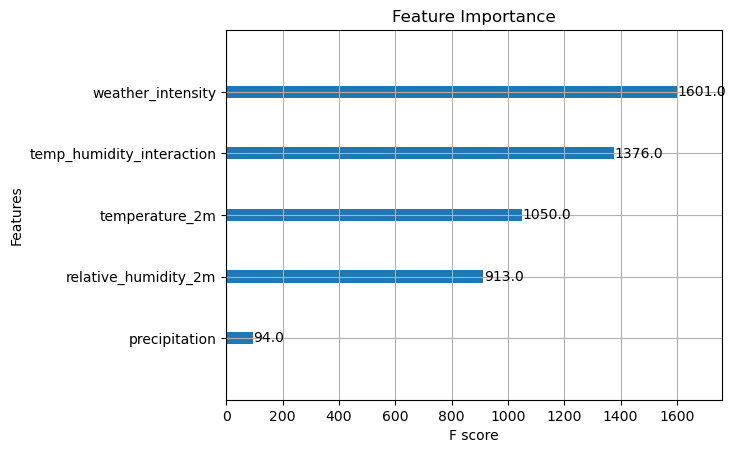

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Feature Importance")
plt.show()


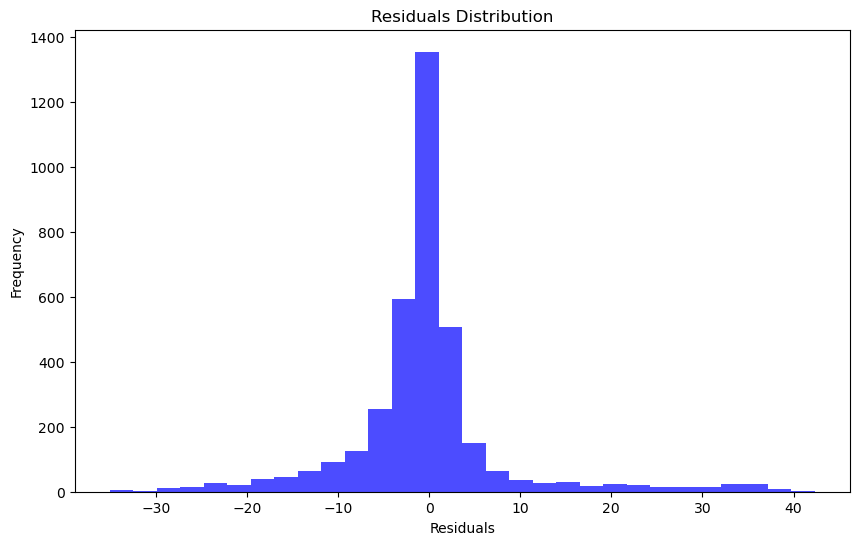

In [ ]:
residuals = y_test - y_pred_xgb

# rusiduals distribution
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
